## Install packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
import tqdm
from ripser import Rips
from sklearn.metrics.pairwise import euclidean_distances

## Read in data

In [17]:
sample_2_1 = pd.read_csv("CT2_Grp1_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_2_2 = pd.read_csv("CT2_Grp2_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_6_1 = pd.read_csv("CT6_Grp1_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_6_2 = pd.read_csv("CT6_Grp2_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_10_1 = pd.read_csv("CT10_Grp1_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_10_2 = pd.read_csv("CT10_Grp2_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_14_1 = pd.read_csv("CT14_Grp1_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_14_2 = pd.read_csv("CT14_Grp2_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_18_1 = pd.read_csv("CT18_Grp1_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_18_2 = pd.read_csv("CT18_Grp2_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_22_1 = pd.read_csv("CT22_Grp1_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]
sample_22_2 = pd.read_csv("CT22_Grp2_RSEM.csv", sep=',', header = 0, index_col = 0)["TPM"]

samples = np.zeros((50600,1))

samples = np.append(np.reshape(sample_2_1.values, (50600,1)), np.reshape(sample_2_2.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_6_1.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_6_2.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_10_1.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_10_2.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_14_1.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_14_1.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_18_1.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_18_2.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_22_1.values, (50600,1)), axis = 1)
samples = np.append(samples, np.reshape(sample_22_1.values, (50600,1)), axis = 1)

pd_data = pd.DataFrame(samples, columns = ["2_1", "2_2", "6_1", "6_2", "10_1", "10_2", "14_1", "14_2", "18_1", "18_2", "22_1", "22_1"], index = sample_2_1.index)
np_data = np.array(pd_data)

In [18]:
pd_data

,2_1,2_2,6_1,6_2,10_1,10_2,14_1,14_2,18_1,18_2,22_1,22_1
gene_id,,,,,,,,,,,,
ENSMUSG00000000001.4,73.33,78.50,82.32,80.29,74.53,76.81,78.50,78.50,81.46,78.95,80.20,80.20
ENSMUSG00000000003.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000028.14,5.97,4.30,7.89,5.20,4.67,5.67,5.81,5.81,5.27,5.96,5.56,5.56
ENSMUSG00000000031.15,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000037.16,0.08,0.12,0.27,0.11,0.12,0.05,0.09,0.09,0.16,0.15,0.22,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000112928.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000112929.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000112930.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
reducer = umap.UMAP()
UMAP = reducer.fit_transform(np_data.T)
print(UMAP.shape)

savetxt('circadian_umap.csv', UMAP, delimiter=',')

c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\umap\umap_.py:1678: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


(12, 2)


In [23]:
UMAP = pd.read_csv("circadian_umap.csv", sep=',', header = None)
UMAP = UMAP.values 

timepoint = np.array(["2", "2", "6", "6", "10", "10", "14", "14", "18", "18", "22", "22"])

print("UMAP shape: "+repr(UMAP.shape))
print("Timepoint shape: "+repr(timepoint.shape))

UMAP shape: (12, 2)
Timepoint shape: (12,)


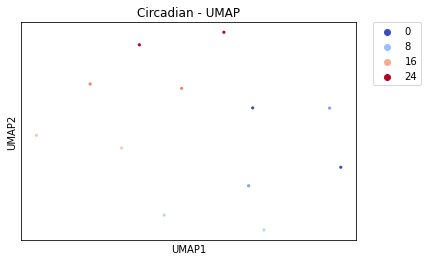

In [26]:
frame1 = sns.scatterplot(UMAP[:,0], UMAP[:,1], s=10, hue = timepoint, linewidth = 0, palette = "coolwarm")
plt.title('Circadian - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Distance Matrix

In [27]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection

In [28]:
np_data = np_data.T
N, d = np_data.shape
 
dist_mat = euclidean_distances(np_data, np_data)

In [9]:
savetxt('dist_mat_circadian.csv', dist_mat, delimiter=',')

dist_mat = pd.read_csv('dist_mat_circadian.csv', sep=",", header = None)
dist_mat = np.array(dist_mat )

In [29]:
print(dist_mat.shape)

(12, 12)


## Visualize Landmarks

In [30]:
#using all points bc only 12 samples - BULK RNAseq
landmarks = [0,1,2,3,4,5,6,7,8,9,10,11]
print(landmarks)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


## Persistence Diagrams

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\ripser\ripser.py:257: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


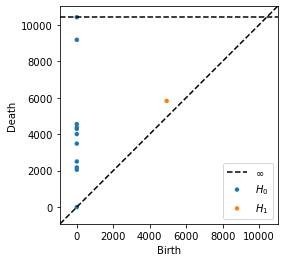

In [31]:
rips = Rips()
diagrams = rips.fit_transform(np_data, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

## Eigen plots

In [32]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection, eigen_plot_numPoints, eigen_calc_from_dist_mat_withNumPoints
from manifold_utils.iga import chakraborty_express, iga

In [ ]:
for i in range(len(landmarks)):
    print(landmarks[i])
    center = landmarks[i]
    radii, eigval_list, eigvec_list = eigen_calc_from_dist_mat(np_data, dist_mat, center, radint = 10)

    rmin = radii[0]
    rmax = radii[-1]
    
    eigen_plot(eigval_list, radii, rmin, rmax)

0
